In [325]:
import pyvisa
import matplotlib.pyplot as plt
import numpy as np

rm = pyvisa.ResourceManager()
rm.list_resources()

inst = rm.open_resource('TCPIP0::192.168.1.104::INSTR')
inst.write('*RST')

6

In [326]:
inst.write('@LOC')
inst.write('*RST')
inst.write('SYSTem:TSLock OFF)')
inst.write('SYSTem:DISPlay:UPDate ON')
inst.write('SYSTem:DISPlay:BAR:STOols ON')
inst.write('SYSTem:KLOCk OFF')

18

In [85]:
inst.write('@LOC')

6

In [99]:
inst.write('SEN2:SWE:TYPE CW')

18

In [298]:
trace = 1
channel = 2


inst.write('*RST')
inst.write('CALC:PAR:DEL:ALL')
inst.timeout = 30000

inst.write(f"CALC{channel}:PAR:SDEF 'Tr{trace}', 'S22'")
inst.write(f"DISPlay:WINDow:TRAC{channel}:FEED 'Tr{trace}'")

inst.write(f'SEN{channel}:SWE:TYPE CW')
inst.write(f'SOUR{channel}:POW 0dbm')
inst.write(f'SOUR{channel}:FREQ:FIX 400000Hz')
# inst.write(f'SWEep{channel}:POINts 100001')
# inst.write(f'SENSe{channel}:SWEep:TIME 10')


inst.write(f'INITiate{channel}:CONTinuous OFF')
# inst.write(f'CALCulate{channel}:TRANsform:TIME:STOP 100')

# inst.write(f"INIT{channel}:ALL")
# inst.write('*WAI')
# data = inst.query(f"CALC{channel}:DATA:TRACe? 'Tr{trace}', SDAT")
# data = np.fromstring(data, dtype='float64',sep=',')

# real, imag = data[::2], data[1::2]
# S = np.array(real+1j*imag, dtype='complex128')

timeaxis = inst.query(f'CALC{channel}:DATA:STIM?')

In [ ]:
inst.write(f'')

In [299]:
timeaxis

'100000,200099500,400099000,600098500,800098000,1000097500,1200097000,1400096500,1600096000,1800095500,2000095000,2200094500,2400094000,2600093500,2800093000,3000092500,3200092000,3400091500,3600091000,3800090500,4000090000,4200089500,4400089000,4600088500,4800088000,5000087500,5200087000,5400086500,5600086000,5800085500,6000085000,6200084500,6400084000,6600083500,6800083000,7000082500,7200082000,7400081500,7600081000,7800080500,8000080000,8200079500,8400079000,8600078500,8800078000,9000077500,9200077000,9400076500,9600076000,9800075500,1.0000075E+010,1.02000745E+010,1.0400074E+010,1.06000735E+010,1.0800073E+010,1.10000725E+010,1.1200072E+010,1.14000715E+010,1.1600071E+010,1.18000705E+010,1.200007E+010,1.22000695E+010,1.2400069E+010,1.26000685E+010,1.2800068E+010,1.30000675E+010,1.3200067E+010,1.34000665E+010,1.3600066E+010,1.38000655E+010,1.4000065E+010,1.42000645E+010,1.4400064E+010,1.46000635E+010,1.4800063E+010,1.50000625E+010,1.5200062E+010,1.54000615E+010,1.5600061E+010,1.5800060

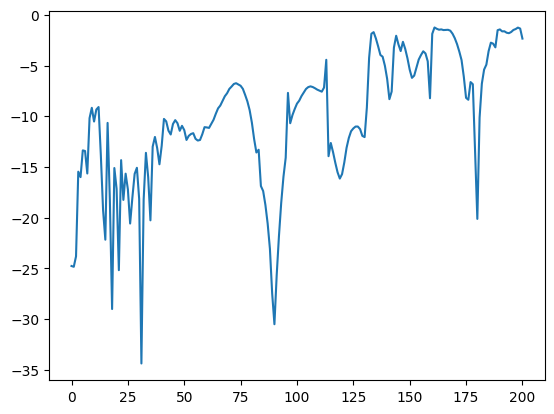

In [270]:
# toplot = np.fromstring(data, dtype=np.uint16)
plt.plot(20*np.log10(np.abs(S)))

In [345]:
trace = 1
channel = 2

measure_time=2     # [s]
sampling_rate=400  # [Hz]
frequency=1e6      # [Hz]
power = 0          # [dBm]


inst.write('*RST')
inst.write('CALC:PAR:DEL:ALL')
inst.timeout = 30000

# inst.write("DISP:WIND:STAT ON")
inst.write("CALC2:PAR:SDEF 'Tr1', 'S22'")
inst.write("DISPlay:WINDow:TRAC2:FEED 'Tr1'")
inst.timeout=int(np.ceil(np.max([measure_time*1.2,10])*1e3))

inst.write("SENSe2:SWEep:Type POINt")
# inst.write("SENSe2:FREQuency:CENTer %i"%frequency)
inst.write(f'SOUR{channel}:FREQ:FIX {frequency}')
inst.write("SOURce2:POWer %i"%power)

points=int(np.ceil(measure_time*sampling_rate))
bandwidths=[  1, 1.5,  2,  3,  5,  7, 10,
                1e1,15e0,2e1,3e1,5e1,7e1,1e2,
                1e2,15e1,2e2,3e2,5e2,7e2,1e3,
                1e3,15e2,2e3,3e3,5e3,7e3,1e4,
                1e4,15e3,2e4,3e4,5e4,7e4,1e5,
                1e5,15e4,2e5,3e5,5e5,7e5,1e6]
check=False
for bw in bandwidths:
        if check==False:
                inst.write("SENSe2:BANDwidth %i"%int(bw))
                inst.write("SENSe2:SWEep:POINts %i"%points)
                inst.write("SENSe2:SWEep:TIME %f"%measure_time)
                inst.write('*WAI')
                checktime=float(inst.query('SENSe2:SWEep:TIME?'))
                if checktime==measure_time:
                        check=True
                        bandwidth=bw
if check==True:
        inst.write("SENSe2:BANDwidth %i"%bandwidth)
        inst.write("SENSe2:SWEep:POINts %i"%points)
        inst.write("SENSe2:SWEep:TIME %f"%measure_time)
        # inst.write('*WAI')
        # inst.write('SYSTem:DISPlay:UPDate OFF')
        dwelltime=float(inst.query('SENSe2:SWEep:DWELl?'))
else: 
        print('ERROR: Sampling Rate is too HIGH!')
        dwelltime=np.NaN

inst.query('SENSe2:FREQuency:CENTer?')

'2.000005E+010\n'

In [356]:
inst.write(f'OUTput{channel}:STATe 0')

17

In [350]:

inst.write(f'INITiate{channel}:CONTinuous ON')

25

In [333]:

inst.write(f'SOUR{channel}:FREQ:FIX 400000Hz')

25

In [357]:
inst.write("INITiate2")

11

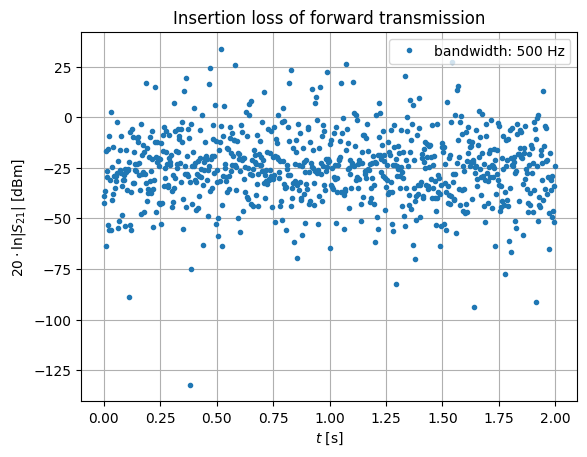

In [373]:

inst.write('*WAI')
timeaxis = inst.query('CALC2:DATA:STIM?')
timeaxis = np.fromstring(timeaxis, dtype='float64', sep=',')
checktime=float(inst.query('SENSe2:SWEep:TIME?'))
timeaxis = (timeaxis-1)/np.shape(timeaxis)*checktime

# gets S21 parameter and save them as real and imag
query_str = "CALC2:DATA:TRACe? 'Tr1', SDAT"
sdata = inst.query(query_str)
data = np.fromstring(sdata, dtype='float64',sep=',')
real, imag = data[::2], data[1::2]

plt.figure(1)
bw=int(inst.query("SENSe2:BANDwidth?"))
plt.plot(timeaxis, 20*np.log(np.abs(real+imag*1j)),'.',
        label='bandwidth: %i Hz'%bw)
plt.grid()
plt.title('Insertion loss of forward transmission')
plt.ylabel('$20\cdot\ln|S_{21}|$ [dBm]')
plt.xlabel('$t$ [s]')
plt.legend(loc=1)

In [89]:
inst.write('sour:pow 0dbm') # 0 bis -30

15

In [90]:
inst.query('sour:pow?')

'0\n'

In [91]:
inst.write('sour:freq:cw 100kHz')

21

In [92]:
inst.query('sour:freq:cw?')

'100000\n'

In [95]:
inst.write('outp 0')

8

In [60]:
inst.query('outp?')

'0\n'

In [51]:
inst.close()

In [ ]:
SOURce2:POWer:STATe 1
SOURce1:POWer:GENerator:PERManent 1
SOUR:POW2:STAT?